# Analisis Exploratorio

## Lectura de Librerias

In [5]:
from src.EDA_functions import *
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

Leemos el set de datos en formato dataframe

In [6]:
data = pd.read_csv("data/TCGA_InfoWithGrade.csv")

In [7]:
data.shape

(839, 24)

Generamos nuevas columnas para indicar de forma categorica el grado, género y raza. A la hora de hacer gráficos usaremos esas columnas para una fácil interpretación

In [8]:
data["Grado"] = data["Grade"].map({1:"GBM",0:"LGG"})
data["Genero"] = data["Gender"].map({1:"Female",0:"Male"})
data["Raza"] = data["Race"].map({1:"black or african",0:"white",2:'asian',3:'american indian or alaska native'})

## Statistical Analysis

In [9]:
data.columns

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA', 'Grado', 'Genero', 'Raza'],
      dtype='object')

In [10]:
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grado,Genero,Raza
0,0,0,51.30,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,LGG,Male,white
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,LGG,Male,white
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,LGG,Male,white
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,LGG,Female,white
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,LGG,Male,white


No hay elementos nulos en el set de datos

In [11]:
data.isna().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
Grado               0
Genero              0
Raza                0
dtype: int64

<Axes: >

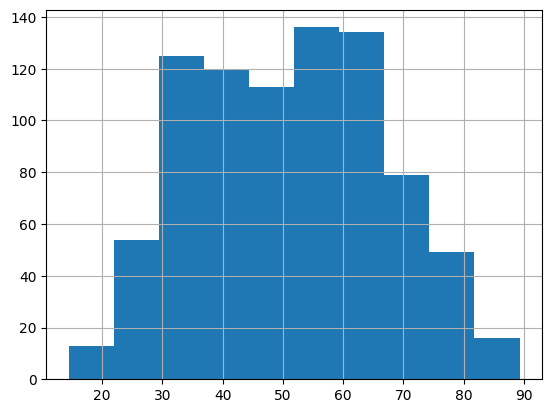

In [12]:
data['Age_at_diagnosis'].hist()

### La variable objetivo esta bastante balanceada

In [13]:
data['Grade'].value_counts()

Grade
0    487
1    352
Name: count, dtype: int64

<Axes: xlabel='Cuenta', ylabel='Grado'>

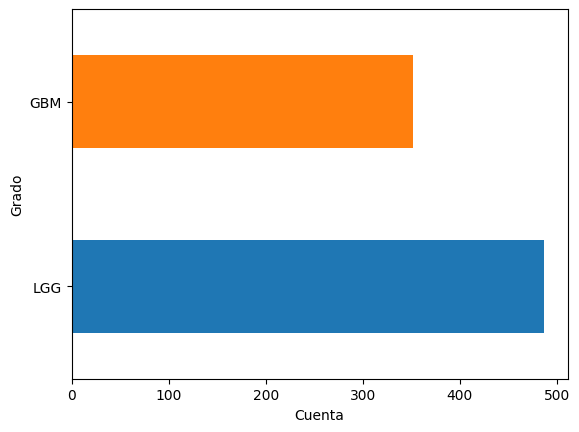

In [14]:
data['Grado'].value_counts().plot(kind="barh", color=['C0', 'C1'],ylabel='Grado', xlabel='Cuenta')

### Distribución de la variable objetivo (grado de glioma) respecto a las variables predictoras clínicas

In [15]:
data['Age_at_diagnosis_interval'] = pd.cut(data['Age_at_diagnosis'], [0,10,20,30,40,50,60,70,80,90,100], include_lowest=True).astype(str)

In [16]:
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grado,Genero,Raza,Age_at_diagnosis_interval
0,0,0,51.30,0,1,0,0,0,0,0,...,0,0,0,0,0,0,LGG,Male,white,"(50.0, 60.0]"
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,LGG,Male,white,"(30.0, 40.0]"
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,LGG,Male,white,"(30.0, 40.0]"
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,1,0,LGG,Female,white,"(30.0, 40.0]"
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,LGG,Male,white,"(30.0, 40.0]"


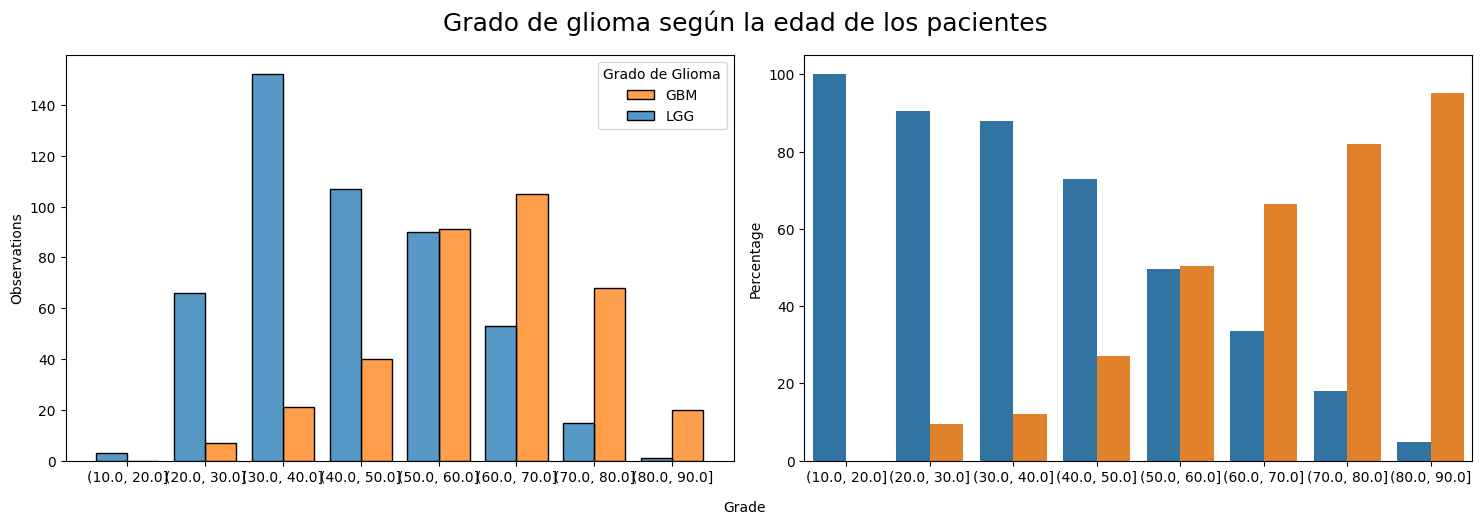

In [17]:
distribution_of_x_over_y(data.sort_values(by='Age_at_diagnosis_interval'), 'Age_at_diagnosis_interval', 'Grade', 'Grado de glioma según la edad de los pacientes')

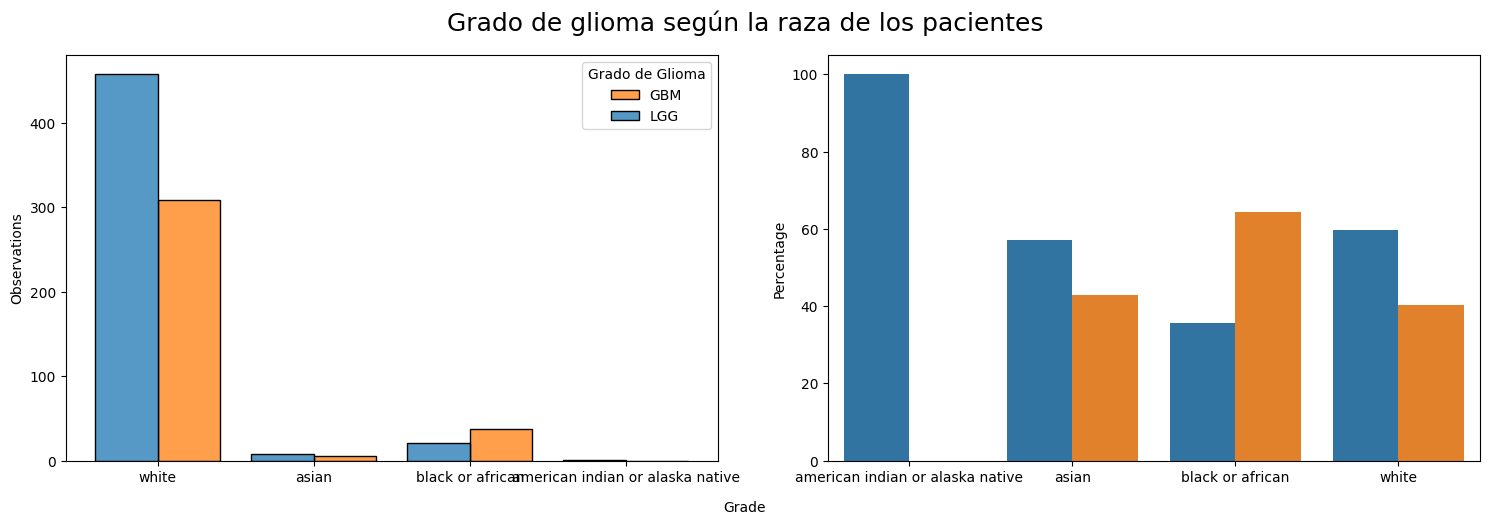

In [18]:
distribution_of_x_over_y(data, 'Raza', 'Grade', 'Grado de glioma según la raza de los pacientes')

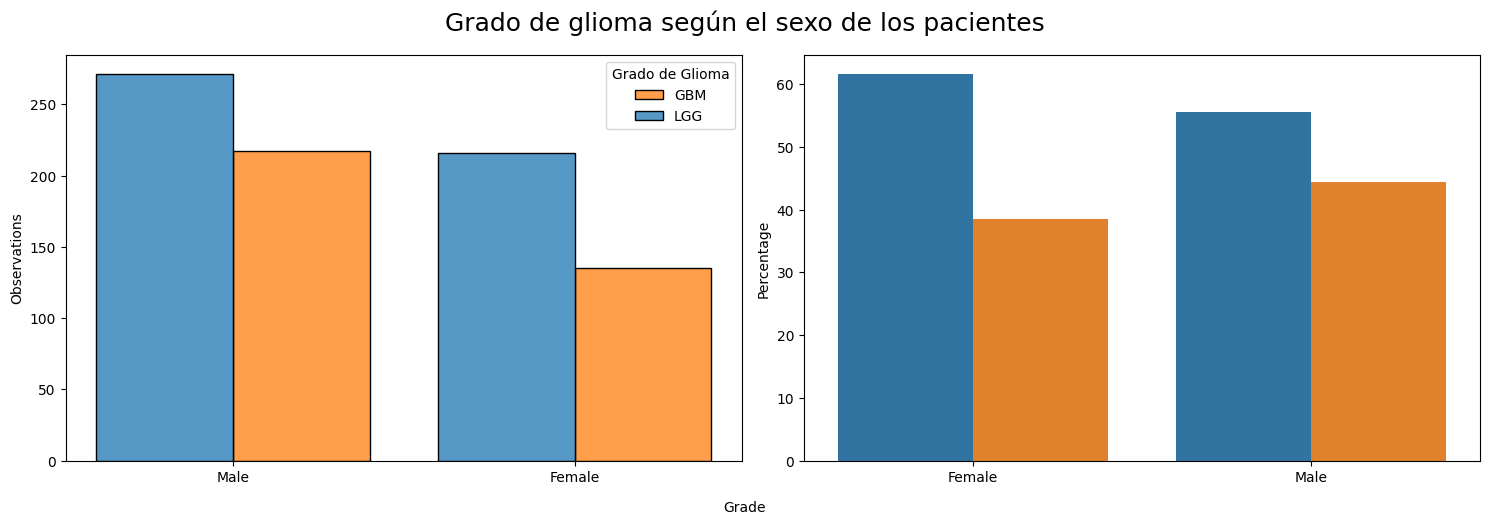

In [19]:
distribution_of_x_over_y(data, 'Genero', 'Grade', 'Grado de glioma según el sexo de los pacientes')

In [20]:
ANOVA(data, 'Age_at_diagnosis', 'Grade')

Normality test: 
               W          pval  normal
Grade                                
0      0.976719  5.180506e-07   False
1      0.982577  2.926501e-04   False
Homedasticity test: 
                W      pval  equal_var
levene  0.505058  0.477484       True
Reject the null hypothesis. There are significant differences between groups.
Anova results:    Source             SS   DF            MS           F         p-unc  \
0   Grade   57865.151011    1  57865.151011  325.589915  9.887743e-62   
1  Within  148755.011022  837    177.724028         NaN           NaN   

        np2  
0  0.280056  
1       NaN  
P-value: 9.887743458660333e-62


In [21]:
chi_square_test(data, 'Gender', 'Grade')

Fail to reject the null hypothesis. There is no significant association between variables.
Chi-Square Statistic: 2.7821315918241236
P-value: 0.0953212258090784
Degrees of Freedom: 1
Expected Frequencies:
[[283.26102503 204.73897497]
 [203.73897497 147.26102503]]


In [22]:
chi_square_test(data, 'Race', 'Grade')

Reject the null hypothesis. There is a significant association between variables.
Chi-Square Statistic: 13.840998970378365
P-value: 0.0031297667107569762
Degrees of Freedom: 3
Expected Frequencies:
[[4.44046484e+02 3.20953516e+02]
 [3.42467223e+01 2.47532777e+01]
 [8.12634088e+00 5.87365912e+00]
 [5.80452920e-01 4.19547080e-01]]


### Distribución de las variables moleculares, cuales son los genes más frecuentemente mutados


In [23]:
genes_mutados = pd.DataFrame(data.drop(columns=["Age_at_diagnosis","Race","Gender",'Grade']).sum()).reset_index()

fig = px.bar(genes_mutados, x='index', y=0, title='Distribución de los genes más frecuentemente mutados',
             labels={
                     "0": "Total",
                     "index": "Genes",
                 })
fig.show()

In [25]:
genes_mutados_grado

Grade,index,0,1
0,IDH1,381,23
1,TP53,235,113
2,ATRX,183,34
3,PTEN,25,116
4,EGFR,31,81
5,CIC,107,4
6,MUC16,41,57
7,PIK3CA,39,34
8,NF1,29,38
9,PIK3R1,21,33


In [28]:
genes_mutados_grado = pd.DataFrame(data.drop(columns=["Age_at_diagnosis","Race","Gender",'Genero','Age_at_diagnosis_interval','Raza','Grado']).groupby("Grade").sum().T.reset_index())

fig = go.Figure(data=[
    go.Bar(name='GBM', x=genes_mutados_grado["index"], y=genes_mutados_grado[1]),
    go.Bar(name='LGG', x=genes_mutados_grado["index"], y=genes_mutados_grado[0])
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Expressión de los genes mutados por grado de glioma',xaxis_title="Genes", yaxis_title="Cuenta")
fig.show()

In [21]:
chi_square_test(data, 'IDH1', 'Grade')

Reject the null hypothesis. There is a significant association between variables.
Chi-Square Statistic: 417.86078898365975
P-value: 7.129739128560858e-93
Degrees of Freedom: 1
Expected Frequencies:
[[252.49702026 182.50297974]
 [234.50297974 169.49702026]]


In [22]:
chi_square_test(data, 'TP53', 'Grade')

Reject the null hypothesis. There is a significant association between variables.
Chi-Square Statistic: 21.300213182362413
P-value: 3.92687825508858e-06
Degrees of Freedom: 1
Expected Frequencies:
[[285.00238379 205.99761621]
 [201.99761621 146.00238379]]


In [23]:
chi_square_test(data, 'ATRX', 'Grade')

Reject the null hypothesis. There is a significant association between variables.
Chi-Square Statistic: 81.60224632438656
P-value: 1.664248753544865e-19
Degrees of Freedom: 1
Expected Frequencies:
[[361.04171633 260.95828367]
 [125.95828367  91.04171633]]


In [24]:
chi_square_test(data, 'BCOR', 'Grade')

Fail to reject the null hypothesis. There is no significant association between variables.
Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies:
[[470.16686532 339.83313468]
 [ 16.83313468  12.16686532]]


In [25]:
chi_square_test(data, 'CSMD3', 'Grade')

Fail to reject the null hypothesis. There is no significant association between variables.
Chi-Square Statistic: 1.5813335449455104
P-value: 0.20856871165032265
Degrees of Freedom: 1
Expected Frequencies:
[[471.32777116 340.67222884]
 [ 15.67222884  11.32777116]]


### Analisis Multivariante

All the contracts are unique, there is no duplicated information

In [26]:
data[data.duplicated(keep=False)]

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grado,Genero,Raza,Age_at_diagnosis_interval
409,0,0,35.18,0,1,1,1,0,0,0,...,0,0,0,0,0,0,LGG,Male,white,"(30.0, 40.0]"
424,0,0,35.18,0,1,1,1,0,0,0,...,0,0,0,0,0,0,LGG,Male,white,"(30.0, 40.0]"


In [27]:
data.drop_duplicates().shape

(838, 28)

In [28]:
# !pip install association_metrics

#### Matriz de correlaciones

C:\Users\alilu\PycharmProjects\pythonProject\venv\Lib\site-packages\dython\nominal.py:708: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\alilu\PycharmProjects\pythonProject\venv\Lib\site-packages\dython\nominal.py:709: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



<Figure size 3000x1000 with 0 Axes>

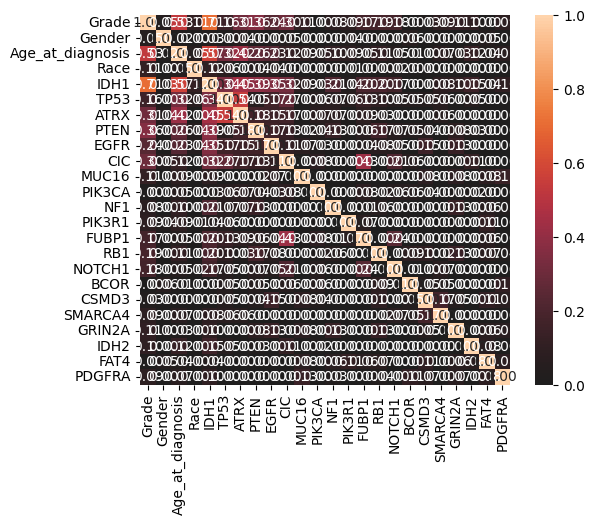

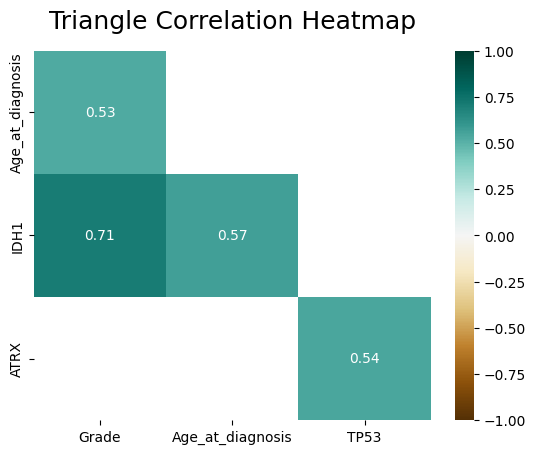

In [29]:
categorical =['Grade', 'Gender','Race', 'IDH1', 'TP53', 'ATRX','PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1','RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4','PDGFRA']
correlation_matrix(data.drop(columns=['Grado', 'Genero', 'Raza']), 0.5, categorical)

### Análisis de Outliers/valores anómalos
No hay valores atípicos. Además, vamos a utilizar métodos ensemble que no se ven tan afectados por los valores atípicos, ya que combinan la predicción de varios clasificadores.

In [30]:
outliers = find_outliers_iqr(data["Age_at_diagnosis"])
if len(outliers) > 0:
    print(len(outliers.index), data["Age_at_diagnosis"].describe(), outliers)
else:
  print("There are not outliers")

There are not outliers
